In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from common.utils import*
from common.networks import*
from common.experiments import *

In [2]:
mat = scipy.io.loadmat('./binaryalphadigs.mat')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

### Experiment 1 : We increase the number of classes in the dataset but with a fixed amount of hidden units and number of epochs in the Contrastive divergence algorithm

In [17]:
input_size = 320
hidden_size = 100
history = []
generated = []
for i,n_classes in enumerate(range(1,11)):
    print("\nConfig {}".format(i+1))
    arrays_list = [ lire_alpha(mat['dat'],i) for i in range(n_classes)]
    test = np.concatenate(arrays_list, axis=0)
    digits_test = torch.tensor(test).float()
    model = RBM(input_size,hidden_size,device)
    pretraining_args = Args(
     n_steps = 1000,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 32,
    device = device,
)
    error,gen = run_experiment_rbm(model,pretraining_args)
    history.append(error)
    generated.append(gen)


Config 1
[INFO] training rbm

Config 2
[INFO] training rbm

Config 3
[INFO] training rbm

Config 4
[INFO] training rbm

Config 5
[INFO] training rbm

Config 6
[INFO] training rbm

Config 7
[INFO] training rbm

Config 8
[INFO] training rbm

Config 9
[INFO] training rbm

Config 10
[INFO] training rbm


Text(0, 0.5, 'Reconstruction error')

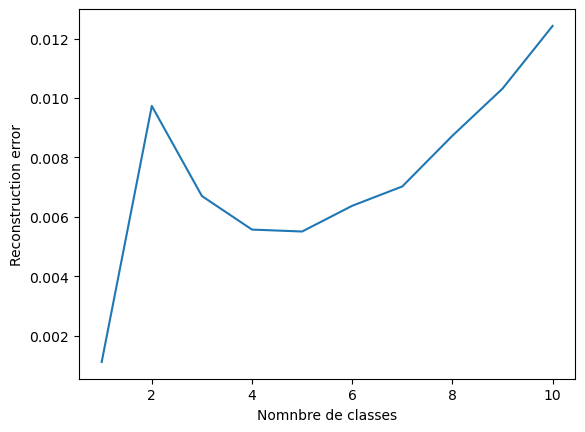

In [18]:
plt.plot(range(1,11),history)
plt.xlabel('Nomnbre de classes')
plt.ylabel('Reconstruction error')

In [19]:
generated = torch.cat(generated)

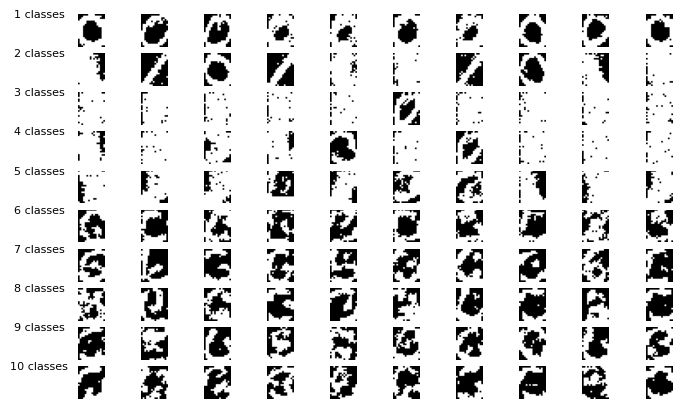

In [20]:
plt.figure(figsize=(8,5))
# Number of rows and columns.
n_rows = generated.size(0)//10
n_cols = 10
for i in range(generated.size(0)):
    ax = plt.subplot(n_rows, n_cols, i+1)
    if i % n_cols ==0:
        ax.text(-1.5,1, f'{(i // n_cols)+1} classes', fontsize=8, ha='center', va='center', transform=ax.transAxes, rotation=0)
    plt.imshow(generated[i].detach().cpu().numpy().reshape(20,16),cmap='gray')
    plt.axis('off')   
plt.show()

### Experiment 2 : We fix the number of classes in the dataset and then number of hidden units  but we increase and number of epochs in the Contrastive divergence algorithm.

In [21]:
input_size = 320
hidden_size = 300
n_classes = 10
arrays_list = [ lire_alpha(mat['dat'],i) for i in range(n_classes)]
test = np.concatenate(arrays_list, axis=0)
digits_test = torch.tensor(test).float()
history = []
generated = []
for i,n_steps in enumerate(range(1000,11000,1000)):
    print("\nConfig {}".format(i+1))
    model = RBM(input_size,hidden_size,device)
    pretraining_args = Args(
     n_steps = n_steps,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 32,
    device = device,
)
    error,gen = run_experiment_rbm(model,pretraining_args)
    history.append(error)
    generated.append(gen)


Config 1
[INFO] training rbm

Config 2
[INFO] training rbm

Config 3
[INFO] training rbm

Config 4
[INFO] training rbm

Config 5
[INFO] training rbm

Config 6
[INFO] training rbm

Config 7
[INFO] training rbm

Config 8
[INFO] training rbm

Config 9
[INFO] training rbm

Config 10
[INFO] training rbm


Text(0, 0.5, 'Reconstruction error')

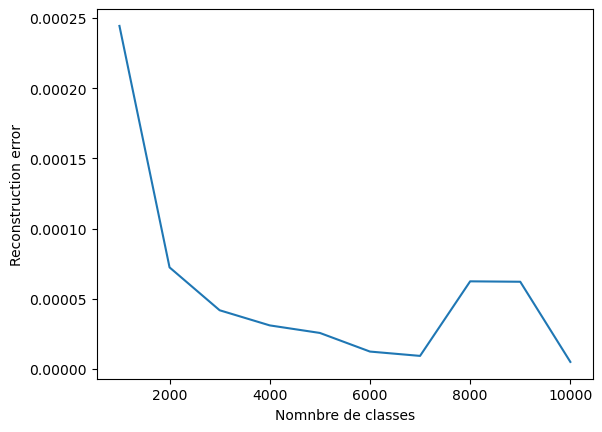

In [22]:
plt.plot(range(1000,11000,1000),history)
plt.xlabel('Nomnbre de classes')
plt.ylabel('Reconstruction error')

In [23]:
generated = torch.cat(generated)

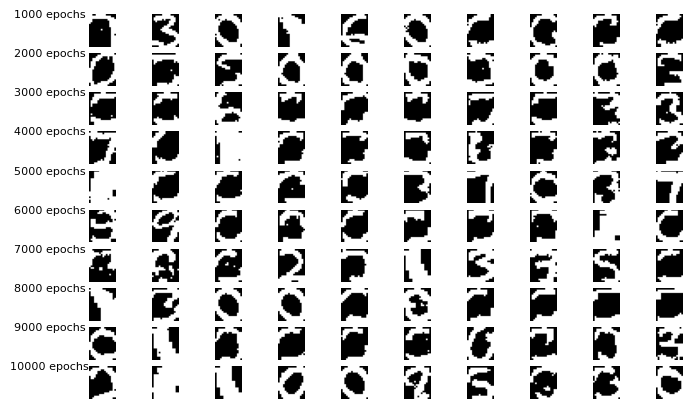

In [24]:
plt.figure(figsize=(8,5))
# Number of rows and columns.
n_rows = generated.size(0)//10
n_cols = 10
for i in range(generated.size(0)):
    ax = plt.subplot(n_rows, n_cols, i+1)
    if i % n_cols ==0:
        ax.text(-1.5,1, f'{((i // n_cols)+1)*1000} epochs', fontsize=8, ha='center', va='center', transform=ax.transAxes, rotation=0)
    plt.imshow(generated[i].detach().cpu().numpy().reshape(20,16),cmap='gray')
    plt.axis('off')   
plt.show()

## DBN

### Influence of the number of classes

In [21]:
input_size = 320
hidden_size = 300
hidden_sizes = [hidden_size, hidden_size,hidden_size]
generated = []
for i,n_classes in enumerate(range(5,15)):
    print("\nConfig {}".format(i+1))
    arrays_list = [ lire_alpha(mat['dat'],i) for i in range(n_classes)]
    test = np.concatenate(arrays_list, axis=0)
    digits_test = torch.tensor(test).float()
    model = DBN(input_size,hidden_sizes,device)
    pretraining_args = Args(
     n_steps = 5000,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 32,
    device = device,
)
    gen = run_experiment_dbn(model,pretraining_args)
    generated.append(gen)


Config 1
[INFO] training DBN


100%|██████████| 3/3 [01:04<00:00, 21.52s/it]



Config 2
[INFO] training DBN


100%|██████████| 3/3 [01:14<00:00, 24.77s/it]



Config 3
[INFO] training DBN


100%|██████████| 3/3 [01:23<00:00, 27.87s/it]



Config 4
[INFO] training DBN


100%|██████████| 3/3 [01:34<00:00, 31.33s/it]



Config 5
[INFO] training DBN


100%|██████████| 3/3 [01:43<00:00, 34.62s/it]



Config 6
[INFO] training DBN


100%|██████████| 3/3 [02:01<00:00, 40.37s/it]



Config 7
[INFO] training DBN


100%|██████████| 3/3 [02:10<00:00, 43.64s/it]



Config 8
[INFO] training DBN


100%|██████████| 3/3 [02:20<00:00, 46.81s/it]



Config 9
[INFO] training DBN


100%|██████████| 3/3 [02:30<00:00, 50.25s/it]



Config 10
[INFO] training DBN


100%|██████████| 3/3 [02:47<00:00, 55.82s/it]


In [22]:
generated = torch.cat(generated)

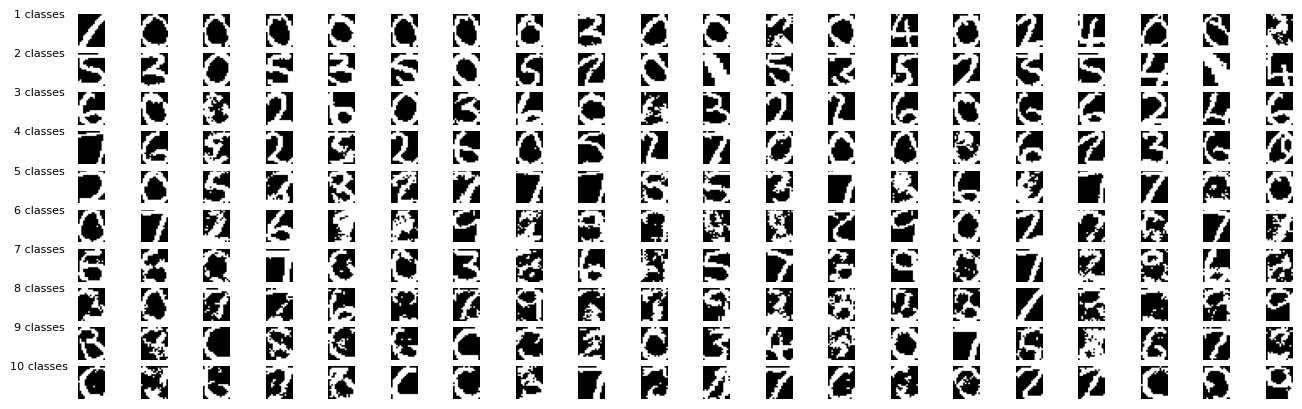

In [25]:
plt.figure(figsize=(16,5))
# Number of rows and columns.
n_rows = generated.size(0)//20
n_cols = 20
for i in range(generated.size(0)):
    ax = plt.subplot(n_rows, n_cols, i+1)
    if i % n_cols ==0:
        ax.text(-1.5,1, f'{(i // n_cols)+1} classes', fontsize=8, ha='center', va='center', transform=ax.transAxes, rotation=0)
    plt.imshow(generated[i].detach().cpu().numpy().reshape(20,16),cmap='gray')
    plt.axis('off')   
plt.show()

### Influence of the number of layers

In [9]:
input_size = 320
hidden_size = 300
n_classes = 5
arrays_list = [ lire_alpha(mat['dat'],i) for i in range(10,n_classes+10)]
test = np.concatenate(arrays_list, axis=0)
digits_test = torch.tensor(test).float()
generated = []
for i,n_layers in enumerate(range(2,10)):
    print("\nConfig {}".format(i+1))
    hidden_sizes = [hidden_size for _ in range(n_layers)]
    model = DBN(input_size,hidden_sizes,device)
    pretraining_args = Args(
     n_steps = 5000,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 128,
    device = device,
)
    gen = run_experiment_dbn(model,pretraining_args)
    generated.append(gen)


Config 1
[INFO] training DBN


100%|██████████| 2/2 [00:16<00:00,  8.40s/it]



Config 2
[INFO] training DBN


100%|██████████| 3/3 [00:25<00:00,  8.58s/it]



Config 3
[INFO] training DBN


100%|██████████| 4/4 [00:34<00:00,  8.68s/it]



Config 4
[INFO] training DBN


100%|██████████| 5/5 [00:43<00:00,  8.72s/it]



Config 5
[INFO] training DBN


100%|██████████| 6/6 [00:52<00:00,  8.76s/it]



Config 6
[INFO] training DBN


100%|██████████| 7/7 [01:01<00:00,  8.77s/it]



Config 7
[INFO] training DBN


100%|██████████| 8/8 [01:10<00:00,  8.79s/it]



Config 8
[INFO] training DBN


100%|██████████| 9/9 [01:19<00:00,  8.78s/it]


In [10]:
generated = torch.cat(generated)

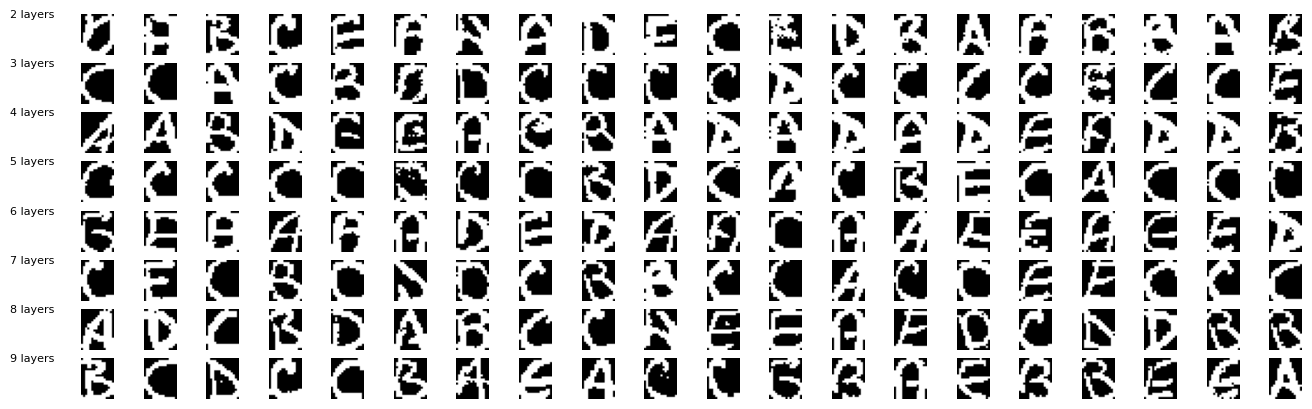

In [11]:
plt.figure(figsize=(16,5))
# Number of rows and columns.
n_rows = generated.size(0)//20
n_cols = 20
for i in range(generated.size(0)):
    ax = plt.subplot(n_rows, n_cols, i+1)
    if i % n_cols ==0:
        ax.text(-1.5,1, f'{(i // n_cols)+2} layers', fontsize=8, ha='center', va='center', transform=ax.transAxes, rotation=0)
    plt.imshow(generated[i].detach().cpu().numpy().reshape(20,16),cmap='gray')
    plt.axis('off')   
plt.show()

### Influence of the number of Neurons per layer

In [16]:
input_size = 320
n_classes = 5
arrays_list = [ lire_alpha(mat['dat'],i) for i in range(10,n_classes+10)]
test = np.concatenate(arrays_list, axis=0)
digits_test = torch.tensor(test).float()
generated = []
for i,hidden_size in enumerate(range(100,1000,100)):
    print("\nConfig {}".format(i+1))
    hidden_sizes = [hidden_size, hidden_size]
    model = DBN(input_size,hidden_sizes,device)
    pretraining_args = Args(
     n_steps = 5000,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 32,
    device = device,
)
    gen = run_experiment_dbn(model,pretraining_args)
    generated.append(gen)


Config 1
[INFO] training DBN


100%|██████████| 2/2 [00:39<00:00, 19.99s/it]



Config 2
[INFO] training DBN


100%|██████████| 2/2 [00:40<00:00, 20.11s/it]



Config 3
[INFO] training DBN


100%|██████████| 2/2 [00:42<00:00, 21.45s/it]



Config 4
[INFO] training DBN


100%|██████████| 2/2 [00:42<00:00, 21.46s/it]



Config 5
[INFO] training DBN


100%|██████████| 2/2 [00:42<00:00, 21.39s/it]



Config 6
[INFO] training DBN


100%|██████████| 2/2 [00:43<00:00, 21.55s/it]



Config 7
[INFO] training DBN


100%|██████████| 2/2 [00:42<00:00, 21.23s/it]



Config 8
[INFO] training DBN


100%|██████████| 2/2 [00:42<00:00, 21.42s/it]



Config 9
[INFO] training DBN


100%|██████████| 2/2 [00:41<00:00, 20.87s/it]


In [17]:
generated = torch.cat(generated)

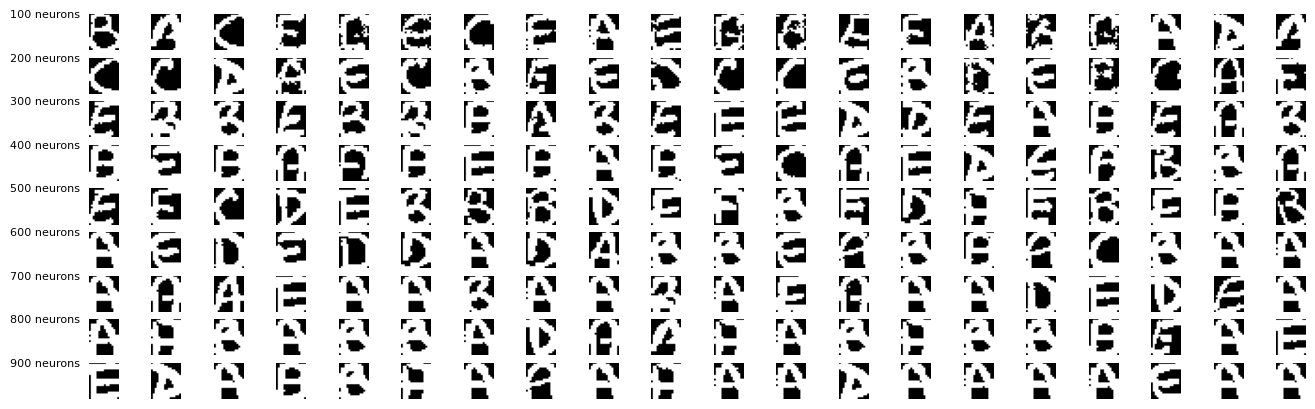

In [20]:
plt.figure(figsize=(16,5))
# Number of rows and columns.
n_rows = generated.size(0)//20
n_cols = 20
for i in range(generated.size(0)):
    ax = plt.subplot(n_rows, n_cols, i+1)
    if i % n_cols ==0:
        ax.text(-1.5,1, f'{100*((i // n_cols)+1)} neurons', fontsize=8, ha='center', va='center', transform=ax.transAxes, rotation=0)
    plt.imshow(generated[i].detach().cpu().numpy().reshape(20,16),cmap='gray')
    plt.axis('off')   
plt.show()